***
# Digit Recognition using Tensorflow and MNIST Dataset
#### (MNIST: Modified National Institute of Standards and Technology database)
***

#### MNIST database is a dataset of 60,000 small square greyscale with 28x28 with an image of handwritten digits from 0 to 9, our motto is to classify the digit input in the drawing padof Gradio interface.
- #### MNIST is widely used to classify the digits and the accuracy varies from 99% ± 0.2-0.4%, below is the example to show the plot for the MNIST dataset. 
- #### this shows the images used in the training set the 28x28 pixels are flattened into a 1D vector which is 784 pixels in size. Each of the 784 pixels making up the image is stored as a value between 0 and 255. 
- #### This determines the grayscale of the pixel, as our images are presented in black and white only. So a black pixel is represented by 255, and a white pixel by 0, with the various shades of gray somewhere in between.

## Example for MNIST dataset Plot

In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


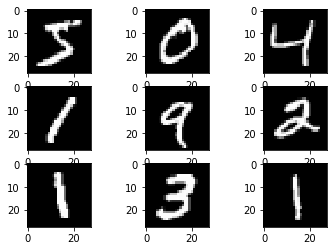

In [1]:
from keras.datasets import mnist
from matplotlib import pyplot
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

### Import the dependencies for the Model i.e. Tensorflow and Gradio (Gradio allows you to quickly create customizable UI components around your TensorFlow or PyTorch models)

In [1]:
import tensorflow as tf
import gradio as gr


### Normalise the data

In [ ]:
(x_train, y_train),(x_test, y_test)= tf.keras.datasets.mnist.load_data()
x_train = x_train/ 255.0,
x_test = x_test/ 255.0

***
# Before Starting the Modelling and coding let's see which all Activation Funcntions we are using in the Model
***

### *ReLU (Rectified Linear Unit): ReLU stands for rectified linear unit, and is a type of activation function. Mathematically, it is defined as*
## $f(x)=max(0,x)$ 
Visually, it looks like the following:

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

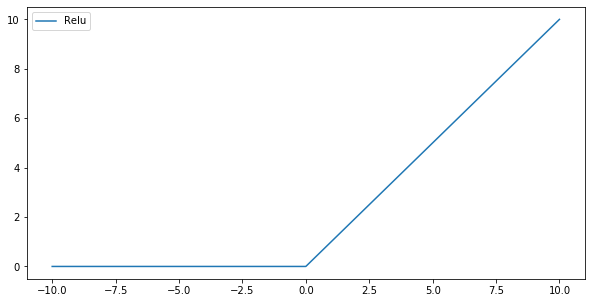

In [11]:
x = np.linspace(-10, 10, 1000)
y = np.maximum(0, x)

plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.legend(['Relu'])
plt.show()

## *Softmax function*

### It is a wonderful activation function that turns numbers aka logits into probabilities that sum to one. Softmax function outputs a vector that represents the probability distributions of a list of potential outcomes.

##### The softmax function is another type of AF used in neural networks to compute probability distribution from a vector of real numbers. This function generates an output that ranges between values 0 and 1 and with the sum of the probabilities being equal to 1. The softmax function is represented as follows:

$$ P(y=j \mid z^{(i)}) = \phi(z^{(i)}) = \frac{e^{z^{(i)}}}{\sum_{j=1}^{k} e^{z_{j}^{(i)}}} $$

## Train the model

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28)),
    tf.keras.layers.Dense(128,activation ='relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
])
model.compile(optimizer ='adam', loss ='sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2613 - accuracy: 0.9254 - val_loss: 0.1387 - val_accuracy: 0.9603
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1142 - accuracy: 0.9659 - val_loss: 0.0972 - val_accuracy: 0.9712
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0780 - accuracy: 0.9770 - val_loss: 0.0821 - val_accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0585 - accuracy: 0.9825 - val_loss: 0.0784 - val_accuracy: 0.9766
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0447 - accuracy: 0.9861 - val_loss: 0.0735 - val_accuracy: 0.9779
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0367 - accuracy: 0.9882 - val_loss: 0.0767 - val_accuracy: 0.9771
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0282 - accuracy: 0.9915 - val_loss: 0.0871 - val_accuracy:

## Building a GUI

In [15]:
def classify (image):
    prediction = model.predict(image).tolist()[0]
    return {str(i): prediction [i] for i in range (10)}
sketchpad = gr.inputs.Sketchpad()
label = gr.outputs.Label(num_top_classes = 3)
interface = gr.Interface(classify, sketchpad, label, live =True,
                        capture_session = True)

In [16]:
interface.launch()

Running locally at: http://127.0.0.1:7861/


----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 52906)
Traceback (most recent call last):
  File "/Users/apple/opt/anaconda3/lib/python3.7/socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/Users/apple/opt/anaconda3/lib/python3.7/socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "/Users/apple/opt/anaconda3/lib/python3.7/socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/Users/apple/opt/anaconda3/lib/python3.7/http/server.py", line 646, in __init__
    super().__init__(*args, **kwargs)
  File "/Users/apple/opt/anaconda3/lib/python3.7/socketserver.py", line 720, in __init__
    self.handle()
  File "/Users/apple/opt/anaconda3/lib/python3.7/http/server.py", line 426, in handle
    self.handle_one_request()
  File "/Users/apple/opt/anaconda3/lib/python3.

(<gradio.networking.serve_files_in_background.<locals>.HTTPServer at 0x7ff441f7a5d0>,
 'http://127.0.0.1:7861/',
 None)